# Introduction to Principal Component Analysis

# What is PCA?

Principal component analysis (PCA) is a fast and flexible unsupervised method for dimensionality reduction in data.

PCA can be used to simplify the data with high dimensions (larger than 2) into 2-dimensional data by eliminating the least influntial features on the data. However, we should know the elimination of data makes the independent variable less interpretable.

In [486]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn import datasets
from sklearn.decomposition import PCA

## Step 1: Load the dataset

In an unsupervised learning approach, the first step is to visualize the data so get a sense or feel of what we are working on.

We plot our data using scatterplots in either 2 dimensions or 3 dimensions to see any patterns or groupings that is currently in our data.

Unfortunately, this approach will not work because most real world datasets more than 3 dimensions.

As an example, let's use the famous iris dataset, which has the following 4 dimensions:
 * Sepal Length
 * Sepal Width
 * Pedal Length
 * Pedal Width

In [487]:
iris = datasets.load_iris(as_frame=True)

X = iris.data
y = iris.target
target_names = iris.target_names

This dataset is made of 4 features/dimensions: sepal length, sepal width, petal length, petal width.

In [488]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Step 2: Use PCA to for reduce the dimensions

Dimensions of iris data set before PCA

In [489]:
X.shape

(150, 4)

We use PCA to project this 4 feature space into a 2-dimensional space.

In [490]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

Dimensions of iris data set after PCA

In [491]:
X_reduced.shape

(150, 2)

## Step 3: Display the explained variances of each principal component using a Scree Plot

In [492]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

Explained variance of PC1 0.9246187232017327
Explained variance of PC2 0.05306648311706482


Ideally, we need to reach at least **90 percent** explained variance. 

Using two principal components results to **97 percent explained variance**.

In [493]:
print("Total explained variance:", explained_variance.sum())

Total explained variance: 0.9776852063187975


Text(0, 0.5, 'Explained Variance')

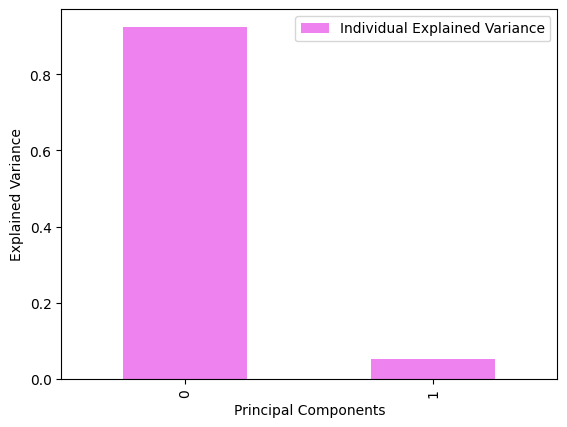

In [494]:
pd.DataFrame(explained_variance).plot.bar(color='violet')
plt.legend(['Individual Explained Variance'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

## Step 4: Plot the features after doing PCA

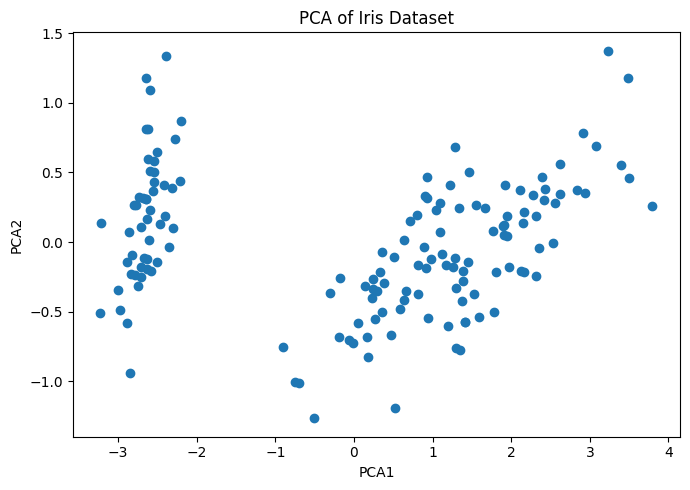

In [495]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(X_reduced[:,0],X_reduced[:,1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Iris Dataset')
plt.tight_layout()

## Step 5: Get the loadings

Each feature will get a weight or loading that indicate the how much it contributes to a specific principal component (PC)

In [496]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=iris.feature_names)
loading_matrix

,PC1,PC2
sepal length (cm),0.743108,0.323446
sepal width (cm),-0.173801,0.359689
petal length (cm),1.761545,-0.085406
petal width (cm),0.736739,-0.037183


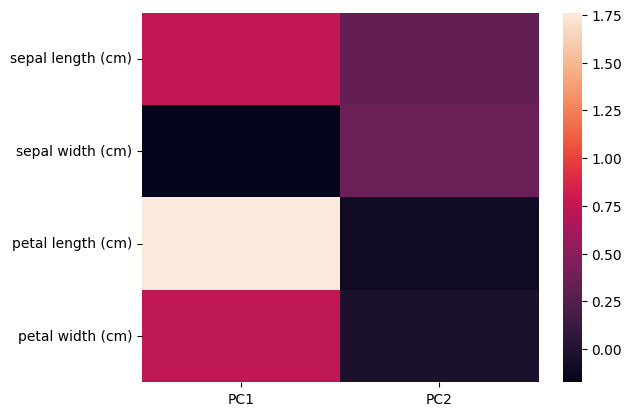

In [497]:
# Heat map
sns.heatmap(loading_matrix)
plt.show()

## Step 6: Use a clustering algorithm

In [498]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,
                  n_init = 10, random_state = 0)
kmeans.fit(X_reduced)

labels = kmeans.labels_  # Cluster labels for each point
centroids = kmeans.cluster_centers_  # Cluster centroids

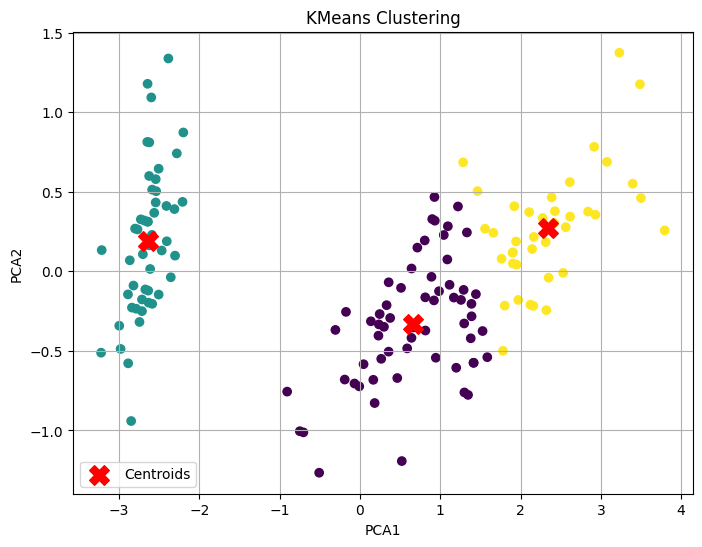

In [499]:
plt.figure(figsize=(8,6))

# Scatter plot
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KMeans Clustering')
plt.legend()
plt.grid(True)
plt.show()